In [1]:
import pandas as pd

def read_time_series(filename, col_name=None):
    with open(filename, 'r') as f:
        full_data = [line.strip() for line in f.readlines()]
    data = [line.split() for line in full_data[1:]]
    df = pd.DataFrame(data).astype('float64')
    if col_name:
        df.columns = col_name
    return df

<AxesSubplot: xlabel='Year'>

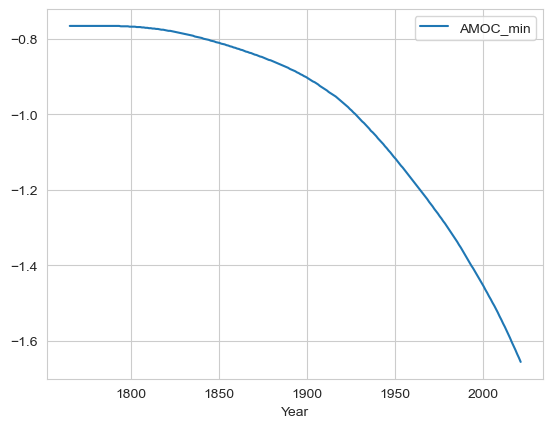

In [6]:
df = read_time_series('../model/worjh2.RpCO2_Rp13CO2.Albani.0ka.historical/biogem/biogem_series_misc_opsi.res', col_name=['Year', "GMOC_min", "GMOC_max", "AMOC_min", "AMOC_max"])

df.plot(x="Year", y="AMOC_min")

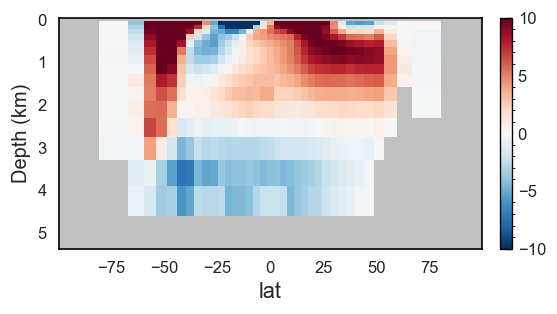

In [1]:
# Plot Streamfunction
from cgeniepy.foram import ForamModel as fm

future = fm("../model/worjh2.RpCO2_Rp13CO2.Albani.2100.4deg")
lgm = fm("../model/muffin.CB.GIteiiva.BASESFeTDTL_rb_foramecogem2.1")
lgm_strong_amoc = fm("../model/muffin.CB.GIteiiva.BASESFeTDTL_rb_foramecogem2.1.modernAMOC")
modern = fm("../model/worjh2.RpCO2_Rp13CO2.Albani.0ka.historical")

lgm.select_var("phys_opsi").isel(time=-1).plot_transection(cmap="RdBu_r", vmax=10, vmin=-10)

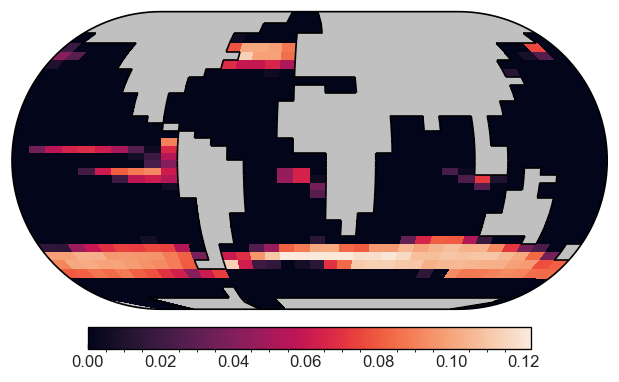

In [3]:
lgm_strong_amoc.select_foramtype("bn").biomass().isel(time=-1).plot_map()

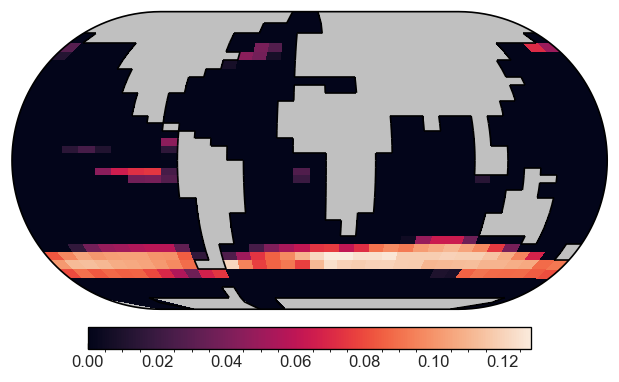

In [4]:
lgm.select_foramtype("bn").biomass().isel(time=-1).plot_map()

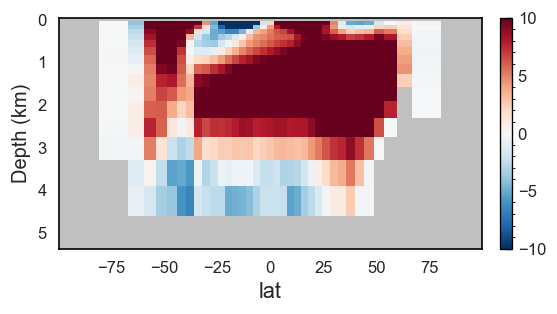

In [2]:
lgm_strong_amoc.select_var("phys_opsi").isel(time=-1).plot_transection(cmap="RdBu_r", vmax=10, vmin=-10)

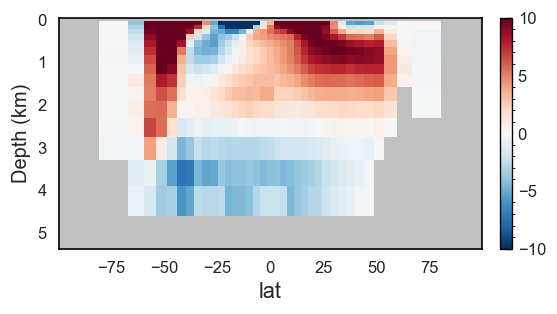

In [12]:
lgm.select_var("phys_opsi").isel(time=-1).plot_transection(cmap="RdBu_r", vmax=10, vmin=-10)

In [40]:
# PI run
pi_temp = read_time_series('../model/worjh2.RpCO2_Rp13CO2.Albani.0ka.historical/biogem/biogem_series_atm_temp.res', col_name=['Year', 'Temperature'])
pi_co2 = read_time_series('../model/worjh2.RpCO2_Rp13CO2.Albani.0ka.historical/biogem/biogem_series_atm_pCO2.res', col_name=['Year', 'pCO2 (mol)', 'pCO2 (ppm)'])
pi_temp['Group'] = 'PI'
pi_temp['Group'] = 'PI'

# Future runs
x,y = [],[]
for temp in ['1p5', '2', '3', '4']:
    model_path = f"../model/worjh2.RpCO2_Rp13CO2.Albani.2100.{temp}deg"
    temp_fname = '/biogem/biogem_series_atm_temp.res'
    pco2_fname = '/biogem/biogem_series_atm_pCO2.res'

    tmp = read_time_series(model_path + temp_fname, col_name=['Year', 'Temperature'])
    tmp['Group'] = temp
    x.append(tmp)

    tmp = read_time_series(model_path + pco2_fname, col_name=['Year', 'pCO2 (mol)', 'pCO2 (ppm)'])
    tmp['Group'] = temp
    y.append(tmp)

# cbind future + PI data
temperature = pd.concat([pd.concat(x, axis=0, ignore_index=True), pi_temp], axis=0, ignore_index=True)
pco2 = pd.concat([pd.concat(y, axis=0, ignore_index=True), pi_co2], axis=0, ignore_index=True)
pco2['pCO2 (ppm)'] = pco2['pCO2 (ppm)'] * 1E6
pco2 = pco2.set_index(["Year","Group"])
temperature = temperature.set_index(["Year","Group"])
all_in_one = pd.concat([pco2, temperature], axis=1, join='outer')
all_in_one = all_in_one.dropna() #drop na caused by inconsistent Year and Group index
all_in_one.to_csv("../data/model_data/model_pCO2_temperature.csv", index=True)